In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from Reward_Training.rt_extension import Reward_Training
from rc_extension import Reward_Competition
from pathlib import Path

In [2]:
experiment_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Data\Rig Data"

csv_path = r"C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\manual_scoring_combined.xlsx"

# Paths to store all plots
directory_path = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\first_last')
directory_path1 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\scatter')
directory_path2 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\win_lose\\EI')
directory_path3 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\win_lose')
directory_path4 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\peth_tone')
directory_path5 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\heatmaps_tone')
directory_path6 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\peth_lick')
directory_path7 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\heatmaps_lick')
directory_path8 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\first_tone')
directory_path9 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\last_tone')
directory_path10 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\win\\trace')
directory_path11 = Path(f'C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert_Cohort_3\\Reward_Comp\\plots\\lose\\trace')                   

# Create the directory (with parents=True to create nested directories)
directory_path.mkdir(parents=True, exist_ok=True)
directory_path1.mkdir(parents=True, exist_ok=True)
directory_path2.mkdir(parents=True, exist_ok=True)
directory_path3.mkdir(parents=True, exist_ok=True)
directory_path4.mkdir(parents=True, exist_ok=True)
directory_path5.mkdir(parents=True, exist_ok=True)
directory_path6.mkdir(parents=True, exist_ok=True)
directory_path7.mkdir(parents=True, exist_ok=True)
directory_path8.mkdir(parents=True, exist_ok=True)
directory_path9.mkdir(parents=True, exist_ok=True)
directory_path10.mkdir(parents=True, exist_ok=True)
directory_path11.mkdir(parents=True, exist_ok=True)

In [3]:
exp = Reward_Competition(experiment_folder_path=experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Data\Rig Data\n1-240611-091131\Notes.txt
read from t=0s to t=2042.14s
Found Synapse note file: C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Data\Rig Data\n1-240612-113256\Notes.txt
read from t=0s to t=2055.01s
Found Synapse note file: C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Data\Rig Data\n1-240614-073020\Notes.txt
read from t=0s to t=2054.68s
Found Synapse note file: C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Data\Rig Data\n2-240611-074031\Notes.txt
read from t=0s to t=2045.31s
Found Synapse note file: C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Data\Rig Data\n2-240612-072325\Notes.txt
read from t=0s to t=2041.48s
Found Synapse note file: C:\Users\yezon\Padilla-Coreano_Lab\Albert_Cohort_3\Reward_Comp\Data\Rig Data\n2-240613-113505\Notes.txt
read from t=0s to t=2047.15s
Found Synapse note file: C:\Users\yezon\Padilla-Core

In [4]:
exp.rtc_processing()

Processing trial n1-240611-091131...
Processing trial n1-240612-113256...
Processing trial n1-240614-073020...
Processing trial n2-240611-074031...
Processing trial n2-240612-072325...
Processing trial n2-240613-113505...
Processing trial n3-240611-115257...
Processing trial n3-240613-085222...
Processing trial n3-240614-090514...
Processing trial n3-240617-095059...
Processing trial n4-240612-085323...
Processing trial n4-240613-072239...
Processing trial n4-240614-130653...
Processing trial n5-240912-080246...
Processing trial n5-240913-094304...
Processing trial n5-240915-060250...
Processing trial n5-240915-095000...
Processing trial n6-240912-062009...
Processing trial n6-240913-062437...
Processing trial n6-240914-065650...
Processing trial n6-240914-095611...
Processing trial n7-240912-095235...
Processing trial n7-240913-080108...
Processing trial n7-240914-082547...
Processing trial n7-240915-073140...
Processing trial nn1_nn3-250203-085508...
Processing trial nn1_pp1-250205-0

## Merging Competition Data with CSV

In [5]:
exp.read_manual_scoring(csv_path)
exp.merge_data()

Total rows: 96
Rows with missing trials: 0


In [6]:
exp.keep_first_tone()
"""exp.keep_last_tone()"""
exp.remove_tangles()
exp.remove_specified_subjects()

df_winning = exp.winning()
df_losing = exp.losing()

            file name subject  \
0   nn5-250203-080636     nn5   
1   pp5-250203-080636     pp5   
2   nn1-250203-085508     nn1   
3   nn3-250203-085508     nn3   
4   pp1-250203-094756     pp1   
..                ...     ...   
91   p5-240913-085922      p5   
92   p6-240913-054041      p6   
93   p8-240913-070924      p8   
94  nn2-250205-113735     nn2   
95  nn4-250205-113735     nn4   

                                               trial  \
0   <trial_class.Trial object at 0x00000221EC285130>   
1   <trial_class.Trial object at 0x00000221EC2CFF20>   
2   <trial_class.Trial object at 0x00000221EC295340>   
3   <trial_class.Trial object at 0x00000221EC285940>   
4   <trial_class.Trial object at 0x00000221EC072240>   
..                                               ...   
91  <trial_class.Trial object at 0x00000221EC072B10>   
92  <trial_class.Trial object at 0x00000221EC284C50>   
93  <trial_class.Trial object at 0x00000221EC287770>   
94  <trial_class.Trial object at 0x00000221

In [7]:
print(df_winning)
print(df_losing)
# compute first lick after tone
exp.find_first_lick_after_sound_cue(df_losing)
exp.find_first_lick_after_sound_cue(df_winning)
# compute offset to first lick after sound cue
exp.compute_closest_port_offset(lick_column='first_lick_after_sound_cue', offset_column='filtered_port_entry_offset', df=df_winning)
exp.compute_closest_port_offset(lick_column='first_lick_after_sound_cue', offset_column='filtered_port_entry_offset', df=df_losing)

            file name subject  \
0   nn5-250203-080636     nn5   
1   pp5-250203-080636     pp5   
2   nn1-250203-085508     nn1   
3   nn3-250203-085508     nn3   
4   pp1-250203-094756     pp1   
..                ...     ...   
90   n7-240913-080108      n7   
91   p5-240913-085922      p5   
92   p6-240913-054041      p6   
94  nn2-250205-113735     nn2   
95  nn4-250205-113735     nn4   

                                               trial  \
0   <trial_class.Trial object at 0x00000221EC285130>   
1   <trial_class.Trial object at 0x00000221EC2CFF20>   
2   <trial_class.Trial object at 0x00000221EC295340>   
3   <trial_class.Trial object at 0x00000221EC285940>   
4   <trial_class.Trial object at 0x00000221EC072240>   
..                                               ...   
90  <trial_class.Trial object at 0x00000221EBAF78F0>   
91  <trial_class.Trial object at 0x00000221EC072B10>   
92  <trial_class.Trial object at 0x00000221EC284C50>   
94  <trial_class.Trial object at 0x00000221

In [8]:
ranks = exp.find_ranks_using_ds(csv_path)
df_winning = exp.merging_ranks(ranks, df=df_winning)
df_losing = exp.merging_ranks(ranks, df=df_losing)

## Computing all DA metrics

In [9]:
exp.compute_event_induced_DA(df_winning)
exp.compute_event_induced_DA(df_losing)

exp.find_mean_event_zscore(df_winning, behavior='Tone')
exp.find_mean_event_zscore(df_losing, behavior='Tone')
exp.find_mean_event_zscore(df_winning, behavior='Lick')
exp.find_mean_event_zscore(df_losing, behavior='Lick')
# computing standard DA
exp.compute_tone_da_metrics(df_winning)
exp.compute_lick_da_metrics(df_winning)
exp.compute_tone_da_metrics(df_losing)
exp.compute_lick_da_metrics(df_losing)

exp.compute_tone_da_metrics(df_winning, mode='EI')
exp.compute_tone_da_metrics(df_losing, mode='EI')
print(df_winning.columns)
# Computing Event Induced DA
exp.compute_lick_da_metrics(df_winning, mode='EI')
exp.compute_lick_da_metrics(df_losing, mode='EI')
print(df_winning)

# Creating column for first and last bouts for winning and losing.
exp.first_last(df_winning)
exp.first_last(df_losing)

AUC (0-4s): 6.776188389622733
AUC (0-4s): -0.14044191359558772
AUC (0-4s): 1.774681954569402
AUC (0-4s): 2.9209738935585077
AUC (0-4s): 0.6631842307701888
AUC (0-4s): 0.9107938075258343
AUC (0-4s): 1.508890784952015
AUC (0-4s): -0.7196090046252062
AUC (0-4s): 4.372373601701939
AUC (0-4s): 6.119572151757716
AUC (0-4s): 2.4688991244233005
AUC (0-4s): 0.2597160503324172
AUC (0-4s): 3.01036174547179
AUC (0-4s): 1.7120737567801807
AUC (0-4s): -0.12868118565177755
AUC (0-4s): -1.0726499034631911
AUC (0-4s): 2.4102744840199906
AUC (0-4s): 3.1167431262989465
AUC (0-4s): 0.2548620398935706
AUC (0-4s): 0.4227074977836964
AUC (0-4s): 3.2361796042759368
AUC (0-4s): 0.6557910582881393
AUC (0-4s): 0.9814935176922909
AUC (0-4s): 3.343767868978338
AUC (0-4s): -0.28025683152072156
AUC (0-4s): -0.3984169257911604
AUC (0-4s): 1.4360984403748496
AUC (0-4s): 0.8901204534799458
AUC (0-4s): 4.816801428400356
AUC (0-4s): 3.732218314442288
AUC (0-4s): 6.030698685482289
AUC (0-4s): -0.3048245825943981
AUC (0-4s

## PSTH Graphs

In [10]:
# Plots PSTHs for all bouts within a session based on winning or losing
"""exp.apply_rc_plot_peth(df_winning, directory_path=directory_path10)
exp.apply_rc_plot_peth(df_losing, directory_path=directory_path11)"""

'exp.apply_rc_plot_peth(df_winning, directory_path=directory_path10)\nexp.apply_rc_plot_peth(df_losing, directory_path=directory_path11)'

In [11]:
# Plots the Tone PETH of the first and last bouts of either win or loss side by side.
"""exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)"""

"exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)\nexp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)"

In [12]:
# Plots the Lick PETH of first and last win and lose bouts
"""exp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='NAc', y_min=6, y_max=-1.5)"""

"exp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='NAc', y_min=6, y_max=-1.5)\nexp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='NAc', y_min=6, y_max=-1.5)"

## Mean PSTH graphs

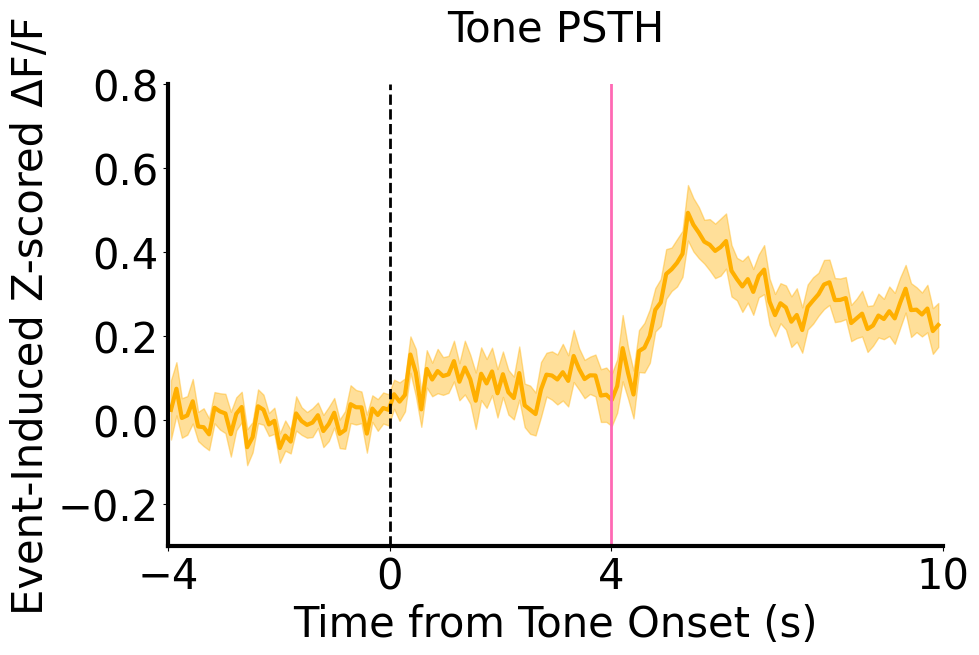

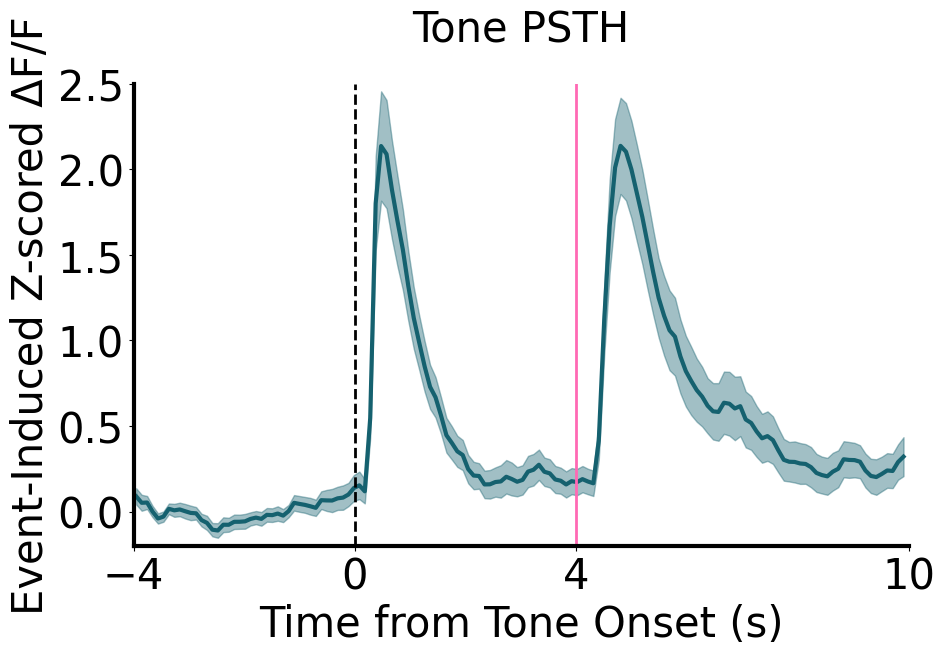

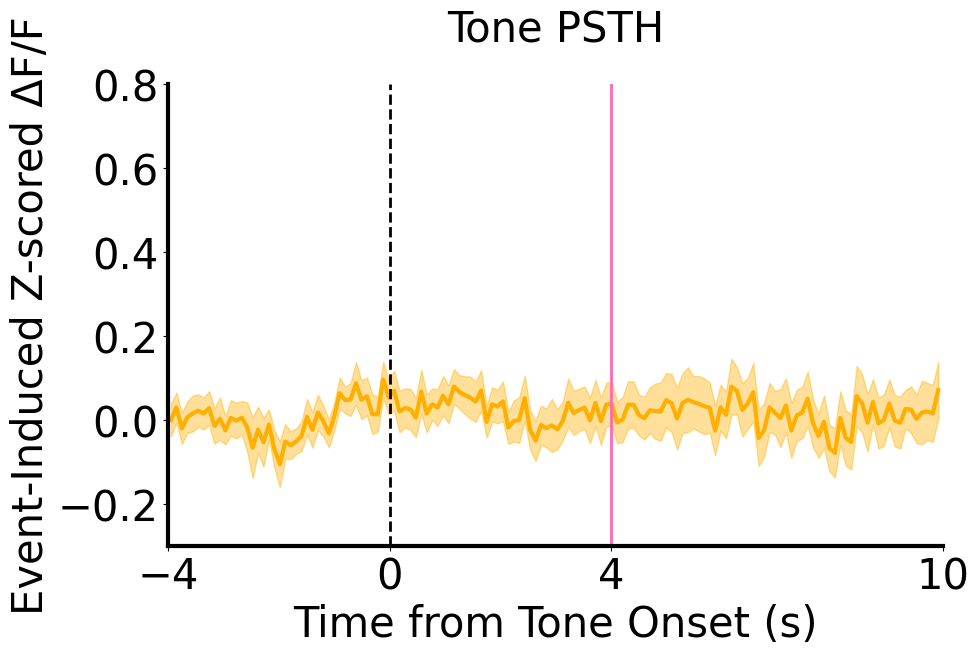

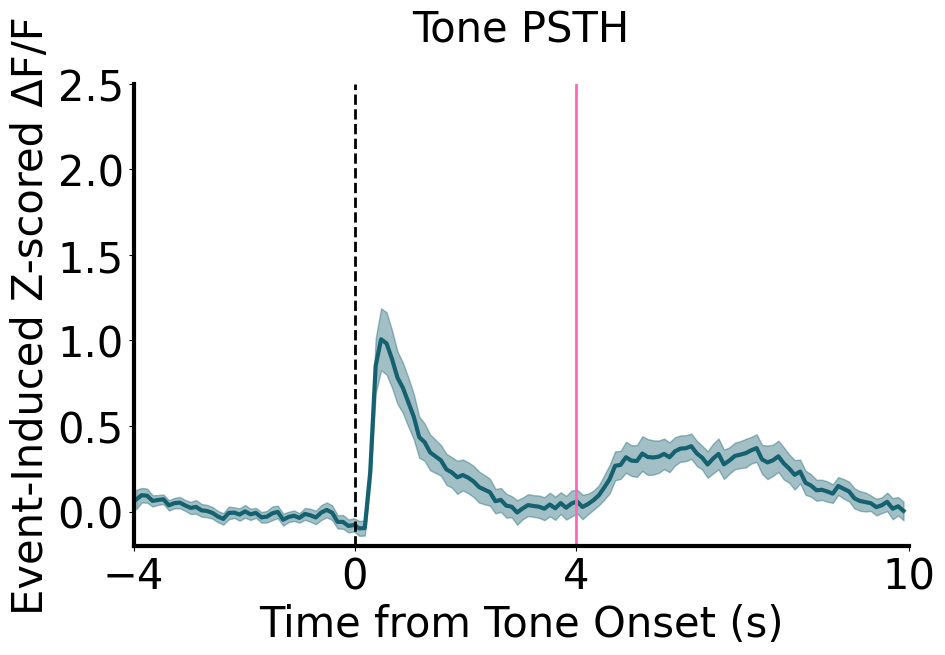

In [13]:
# Plots the mean psth for winning or losing bouts for tones
exp.plot_mean_psth(df_winning, condition='Winning', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=-0.3, y_max=0.8)
exp.plot_mean_psth(df_winning, condition='Winning', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=-0.2, y_max=2.5)
exp.plot_mean_psth(df_losing, condition='Losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=-0.3, y_max=0.8)
exp.plot_mean_psth(df_losing, condition='Losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=-0.2, y_max=2.5)

## PSTH of Losing Trials

In [14]:
# Plots the PSTH of either the first or last bout of losing individually instead of side by side

# Plots the PSTH of the first losing bout
"""exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=True, plot_win=False)
exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=True, plot_win=False)"""

# Plots the PSTH of the last losing bout
"""exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False, plot_win=False)
exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False, plot_win=False)"""

"exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False, plot_win=False)\nexp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False, plot_win=False)"

## PSTH of winning trials

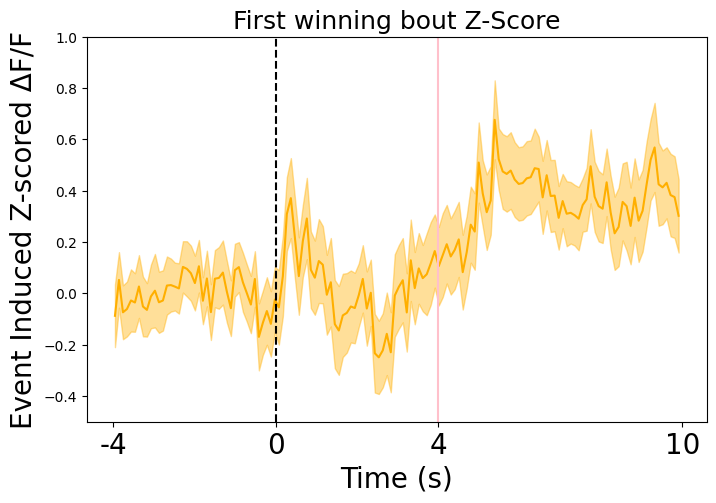

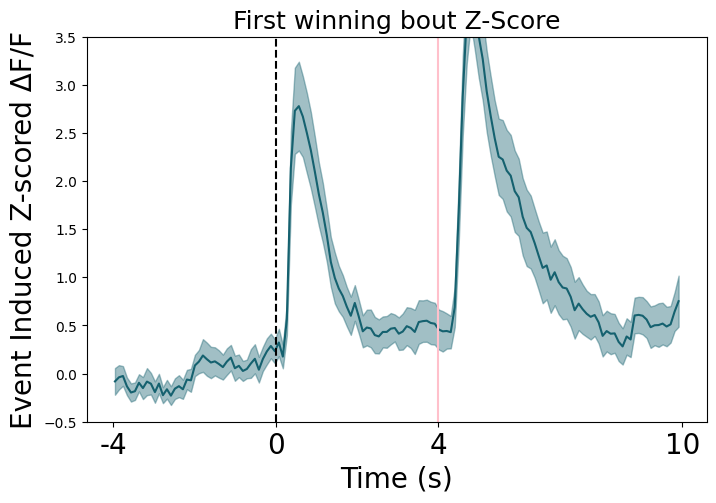

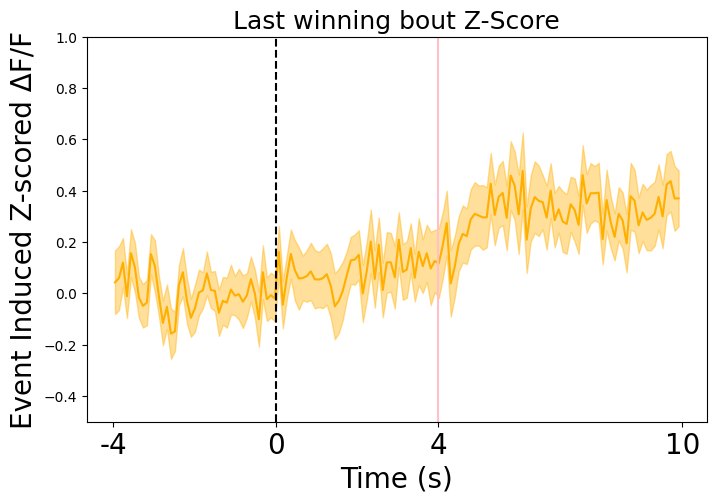

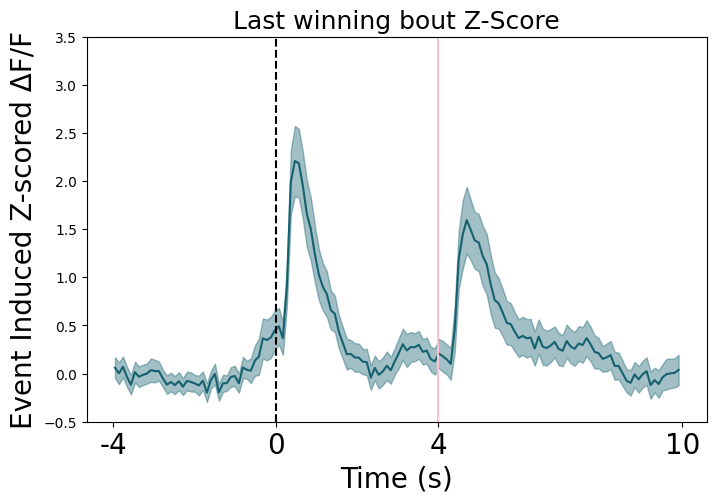

In [15]:
# Plots the PSTH of either the first or last bout of winning individually instead of side by side

# Plots the PSTH of the first winning bout
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=True)
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=True)
# Plots the PSTH of the last winning bout
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False)
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False)

## Heat Maps Tones

In [16]:
# Plots tone response for first and last wins and loses as heatmaps instead of PSTHs
"""exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'mPFC')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'mPFC')
exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'NAc')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'NAc')"""

"exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'mPFC')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'mPFC')\nexp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'NAc')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'NAc')"

## Heat Maps Licks

In [17]:
# Plots lick response for first and last wins and loses as heatmaps instead of PSTHs
"""exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'mPFC')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'mPFC')
exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'NAc')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'NAc')"""

"exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'mPFC')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'mPFC')\nexp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'NAc')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'NAc')"

## First Tone PSTHs

[DEBUG] PSTH: Plotting Tone event index 1 (0-indexed 0) for brain region mPFC
[DEBUG] Row 1, subject pp5: trace shape (14242,), first 5 values: [0.18219879 0.18503562 0.18839782 0.19164053 0.19480298]
[DEBUG] Row 4, subject pp1: trace shape (14242,), first 5 values: [ 0.00909906 -0.00261511 -0.01996877 -0.03705503 -0.0538673 ]
[DEBUG] Row 5, subject pp3: trace shape (14242,), first 5 values: [0.24279767 0.24110384 0.23073735 0.22064418 0.2107979 ]
[DEBUG] Row 6, subject pp6: trace shape (14242,), first 5 values: [-0.91221756 -0.91045236 -0.90789723 -0.90546205 -0.90317126]
[DEBUG] Row 7, subject pp7: trace shape (14242,), first 5 values: [-1.62891249 -1.6304531  -1.6396045  -1.64918098 -1.65914037]
[DEBUG] Row 11, subject pp4: trace shape (14242,), first 5 values: [-1.4061825  -1.40005949 -1.39283776 -1.38581353 -1.37900721]
[DEBUG] Row 13, subject pp1: trace shape (14242,), first 5 values: [0.1265334  0.12749358 0.12895184 0.13042742 0.13191619]
[DEBUG] Row 14, subject pp5: trace shap

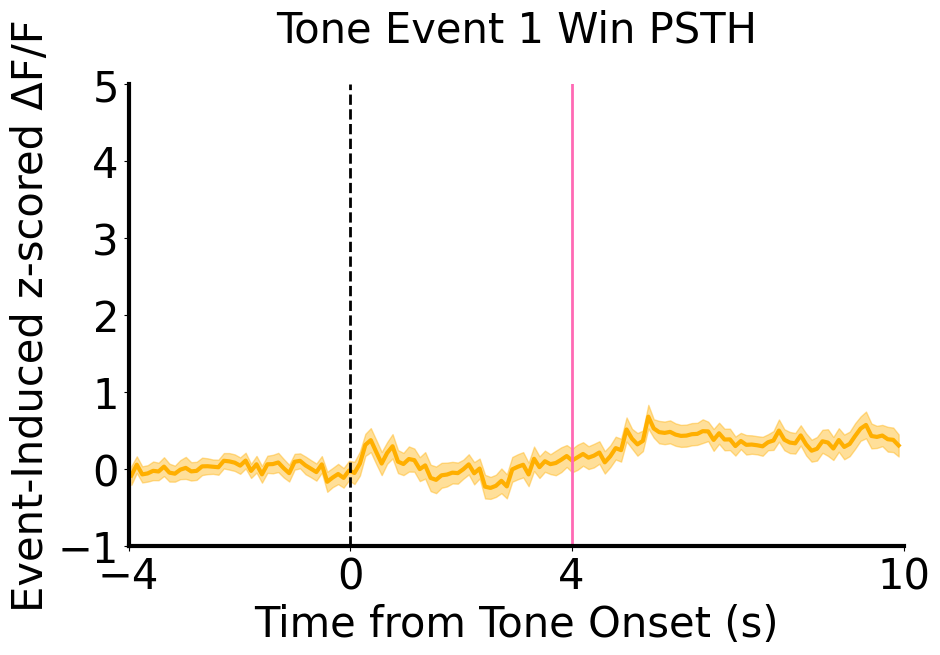

[DEBUG] PSTH: Plotting Tone event index 1 (0-indexed 0) for brain region NAc
[DEBUG] Row 0, subject nn5: trace shape (14242,), first 5 values: [-0.77837663 -0.77840192 -0.78045308 -0.78221951 -0.78370675]
[DEBUG] Row 2, subject nn1: trace shape (14242,), first 5 values: [0.52349396 0.52374542 0.52528544 0.52680415 0.5283105 ]
[DEBUG] Row 3, subject nn3: trace shape (14242,), first 5 values: [-0.1139676  -0.11784131 -0.12580961 -0.13403303 -0.14247152]
[DEBUG] Row 8, subject nn6: trace shape (14242,), first 5 values: [0.51764954 0.51746434 0.51715902 0.51675111 0.5162432 ]
[DEBUG] Row 9, subject nn7: trace shape (14242,), first 5 values: [-0.13060027 -0.13098761 -0.13179303 -0.13271516 -0.13376429]
[DEBUG] Row 10, subject nn4: trace shape (14242,), first 5 values: [0.45247864 0.46447199 0.4790027  0.49359065 0.5082064 ]
[DEBUG] Row 12, subject nn1: trace shape (14242,), first 5 values: [0.71368945 0.71596382 0.72023409 0.72432786 0.72824824]
[DEBUG] Row 16, subject nn5: trace shape (142

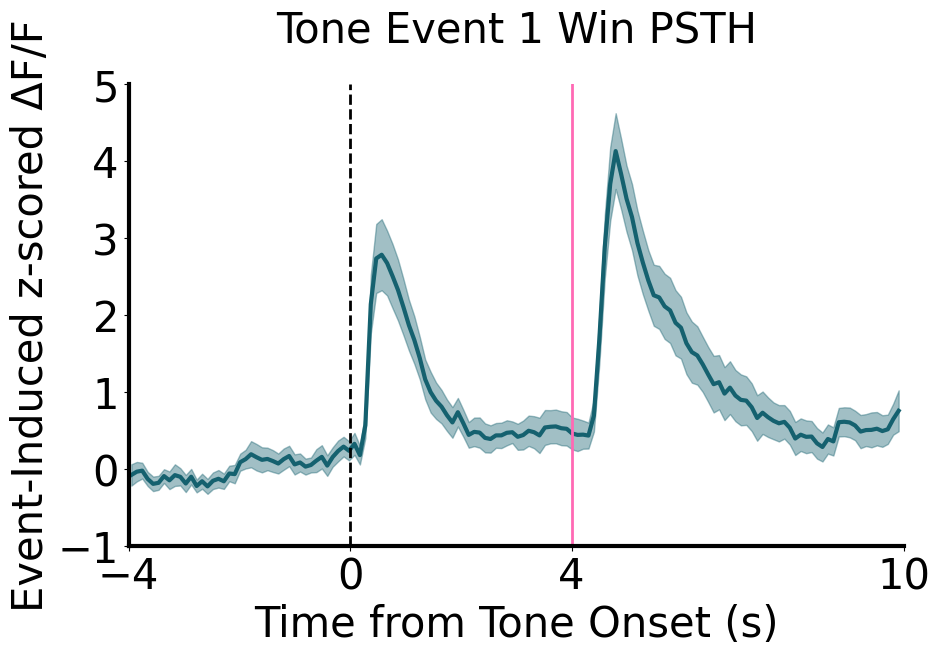

[DEBUG] PSTH: Plotting Tone event index 1 (0-indexed 0) for brain region mPFC
[DEBUG] Row 1, subject pp5: trace shape (14242,), first 5 values: [0.63055176 0.63648869 0.65397899 0.67067597 0.68657686]
[DEBUG] Row 4, subject pp1: trace shape (14242,), first 5 values: [-0.48364903 -0.48156843 -0.46856993 -0.45508206 -0.44113804]
[DEBUG] Row 5, subject pp3: trace shape (14242,), first 5 values: [-1.08502739 -1.08290317 -1.0696679  -1.0561414  -1.04229605]
[DEBUG] Row 6, subject pp6: trace shape (14242,), first 5 values: [0.26398509 0.27520732 0.28645296 0.29768286 0.30892616]
[DEBUG] Row 7, subject pp7: trace shape (14242,), first 5 values: [-0.0305135  -0.00908712  0.01278433  0.0349836   0.05751399]
[DEBUG] Row 11, subject pp4: trace shape (14242,), first 5 values: [-0.66990197 -0.66175292 -0.6450592  -0.62782981 -0.61007586]
[DEBUG] Row 13, subject pp1: trace shape (14242,), first 5 values: [0.18696184 0.19816386 0.23227568 0.2661729  0.29985275]
[DEBUG] Row 14, subject pp5: trace shap

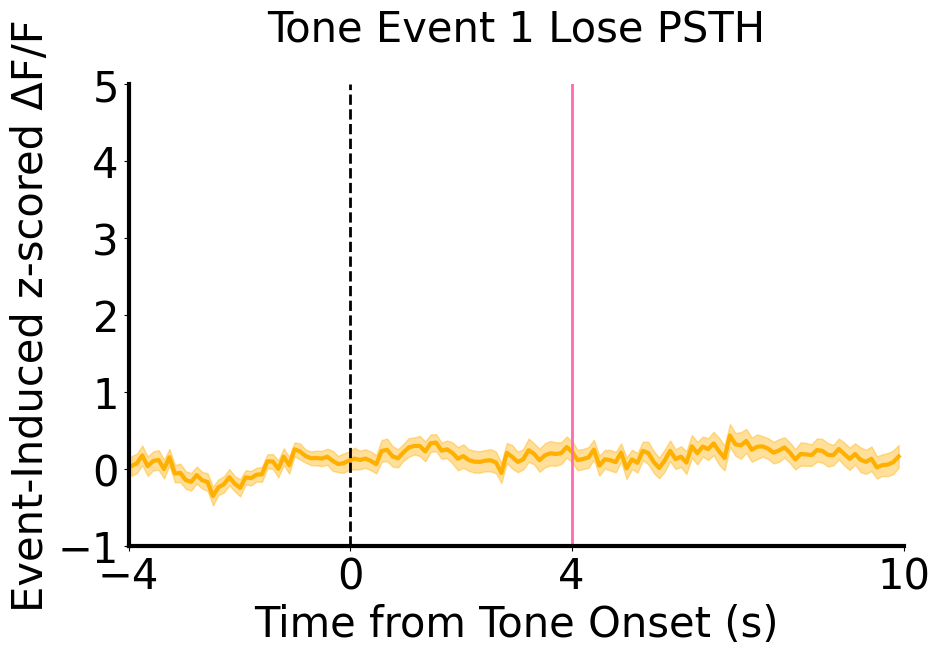

[DEBUG] PSTH: Plotting Tone event index 1 (0-indexed 0) for brain region NAc
[DEBUG] Row 0, subject nn5: trace shape (14242,), first 5 values: [0.69541714 0.70003388 0.70547417 0.71073819 0.71583904]
[DEBUG] Row 2, subject nn1: trace shape (14242,), first 5 values: [0.66666297 0.6663219  0.66557418 0.66471025 0.66373151]
[DEBUG] Row 3, subject nn3: trace shape (14242,), first 5 values: [0.02877549 0.02873933 0.02852084 0.02832516 0.02815917]
[DEBUG] Row 8, subject nn6: trace shape (14242,), first 5 values: [-0.33947887 -0.33971743 -0.34120564 -0.34273522 -0.34429352]
[DEBUG] Row 9, subject nn7: trace shape (14242,), first 5 values: [2.76015952 2.75910138 2.75254186 2.74604573 2.73961469]
[DEBUG] Row 10, subject nn4: trace shape (14242,), first 5 values: [0.54133498 0.53928031 0.53508051 0.53074943 0.52629695]
[DEBUG] Row 12, subject nn1: trace shape (14242,), first 5 values: [-0.68520194 -0.68565458 -0.68704577 -0.68847592 -0.68995329]
[DEBUG] Row 16, subject nn5: trace shape (14242,),

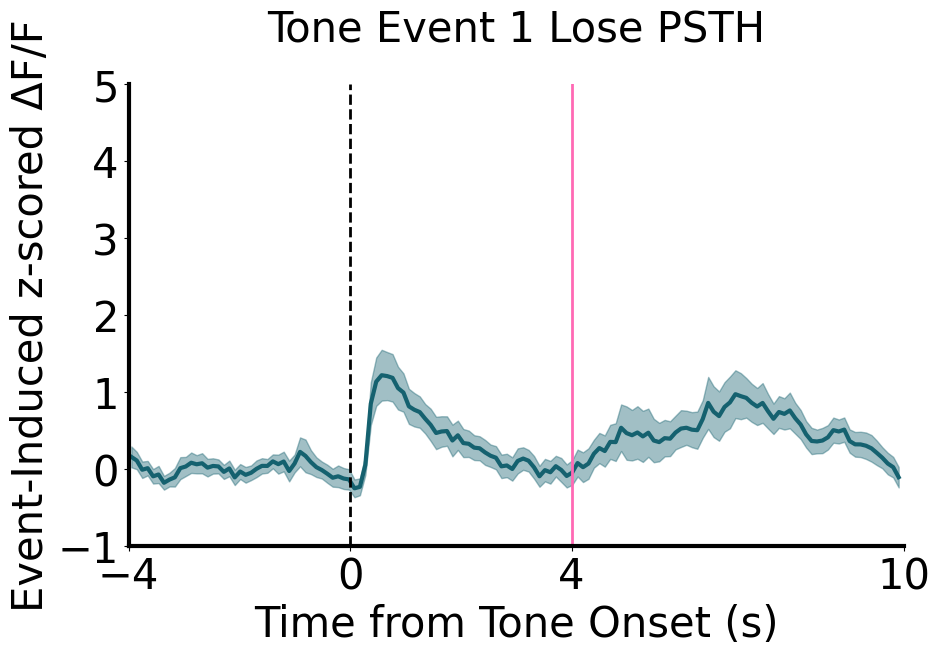

In [18]:
# Winning First tone response
exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=directory_path8, brain_region='mPFC', y_min=-1, y_max=5, df=df_winning, condition='Win', bin_size=100)
exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=directory_path8, brain_region='NAc', y_min=-1, y_max=5, df=df_winning, condition='Win', bin_size=100)
# Losing First Tone Response
exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=directory_path8, brain_region='mPFC', y_min=-1, y_max=5, df=df_losing, condition='Lose', bin_size=100)
exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=directory_path8, brain_region='NAc', y_min=-1, y_max=5, df=df_losing, condition='Lose', bin_size=100)

## Finding Means

In [ ]:
exp.drop_unnecessary(df_winning)
exp.drop_unnecessary(df_losing)
df_win1 = exp.find_overall_mean(df_winning)
df_lose1 = exp.find_overall_mean(df_losing)

## Heat maps of winning and losing for all subjects

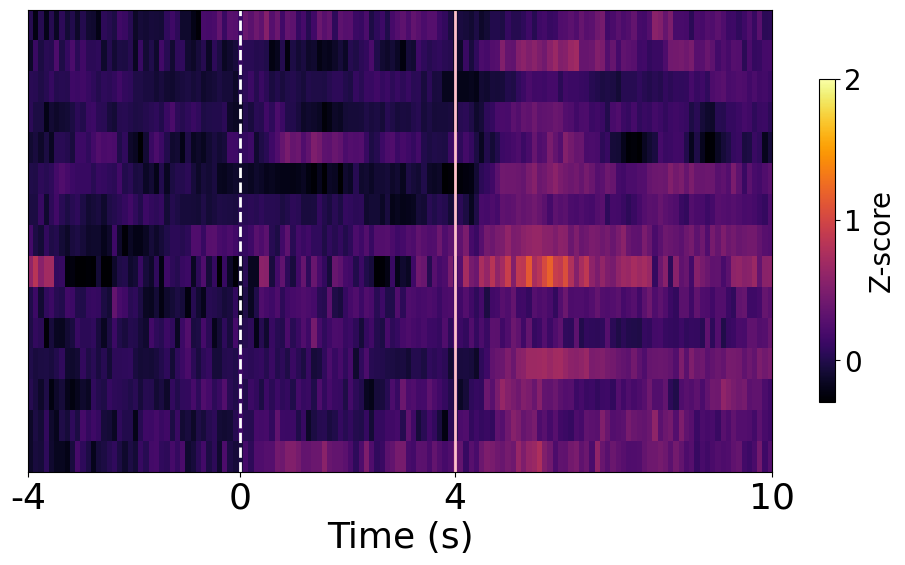

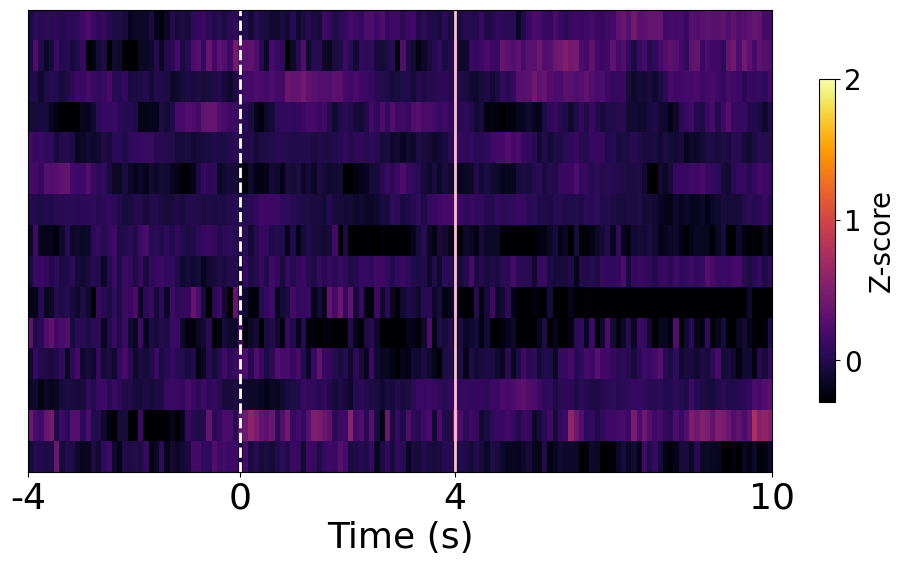

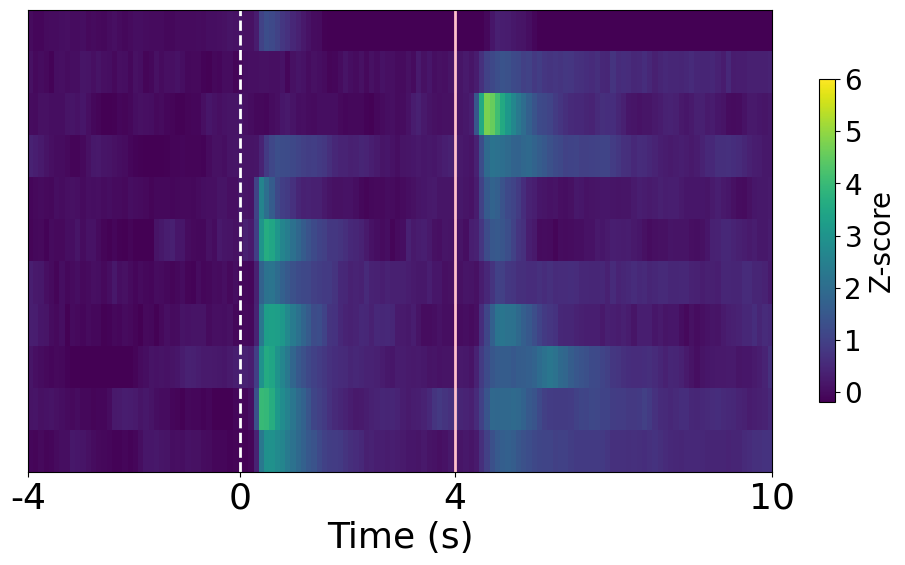

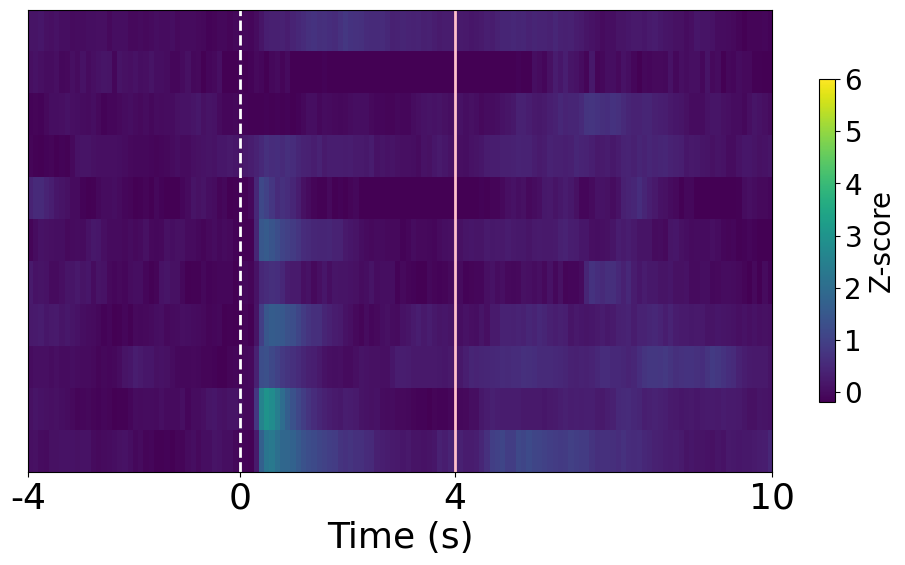

In [20]:
# Each row represents a separate subject
exp.plot_mean_per_row_heatmaps(df_win1, 'win', 'Tone', directory_path8, 'mPFC')
exp.plot_mean_per_row_heatmaps(df_lose1, 'lose', 'Tone', directory_path8, 'mPFC')
exp.plot_mean_per_row_heatmaps(df_win1, 'win', 'Tone', directory_path8, 'NAc')
exp.plot_mean_per_row_heatmaps(df_lose1, 'lose', 'Tone', directory_path8, 'NAc')

    Lick AUC EI
0     -3.082607
1      2.274554
2      1.511753
3      5.484946
4      1.688340
5      0.029209
6      1.930643
7      0.844740
8      2.653352
9      3.461458
10     3.028308
    Lick AUC EI
0      0.308967
1     -0.770028
2      1.367374
3      1.694376
4      0.070656
5      0.043525
6      0.760243
7      1.007618
8      2.019221
9      1.141851
10     1.521598
Index(['Lick AUC EI'], dtype='object')
Processing column: Lick AUC EI
df: 0    -3.082607
1     2.274554
2     1.511753
3     5.484946
4     1.688340
5     0.029209
6     1.930643
7     0.844740
8     2.653352
9     3.461458
10    3.028308
Name: Lick AUC EI, dtype: float64
df1: 0     0.308967
1    -0.770028
2     1.367374
3     1.694376
4     0.070656
5     0.043525
6     0.760243
7     1.007618
8     2.019221
9     1.141851
10    1.521598
Name: Lick AUC EI, dtype: float64
T-test for Lick AUC EI and Lick AUC EI: t=1.384, p=1.896e-01


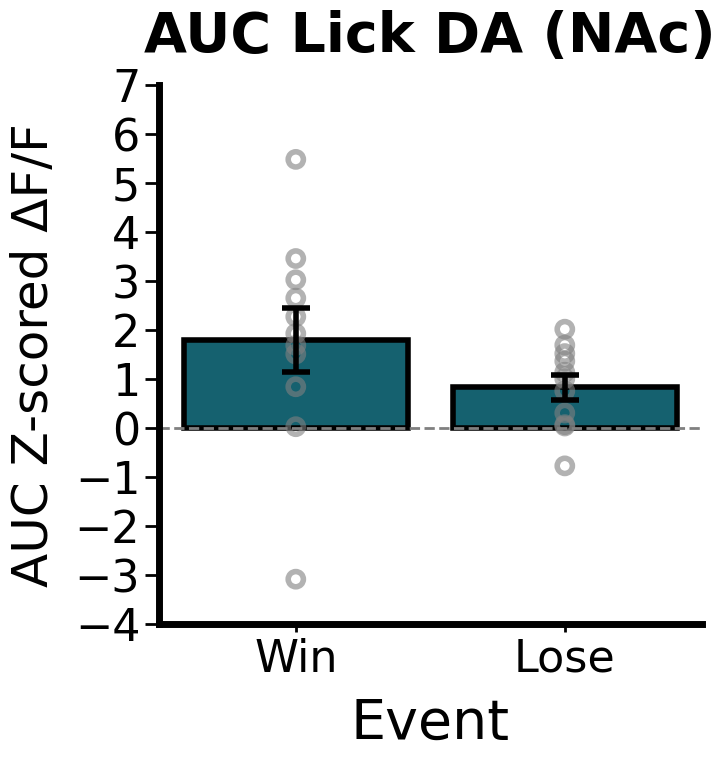

    Lick AUC EI
11     0.822598
12     1.238544
13     0.541748
14     0.389076
15     1.665559
16     1.473251
17     0.903667
18     1.421519
19     2.099883
20     1.031509
21     0.405111
22     1.692344
23     1.489848
24     1.073469
25     0.873451
    Lick AUC EI
11     0.772222
12     0.903895
13     0.637969
14     0.596524
15    -0.110183
16     0.203810
17    -0.303042
18    -0.522310
19     0.271236
20    -2.279512
21    -0.394483
22     0.209637
23    -0.378031
24     1.508936
25    -0.489694
Index(['Lick AUC EI'], dtype='object')
Processing column: Lick AUC EI
df: 11    0.822598
12    1.238544
13    0.541748
14    0.389076
15    1.665559
16    1.473251
17    0.903667
18    1.421519
19    2.099883
20    1.031509
21    0.405111
22    1.692344
23    1.489848
24    1.073469
25    0.873451
Name: Lick AUC EI, dtype: float64
df1: 11    0.772222
12    0.903895
13    0.637969
14    0.596524
15   -0.110183
16    0.203810
17   -0.303042
18   -0.522310
19    0.271236
20   -2.279512


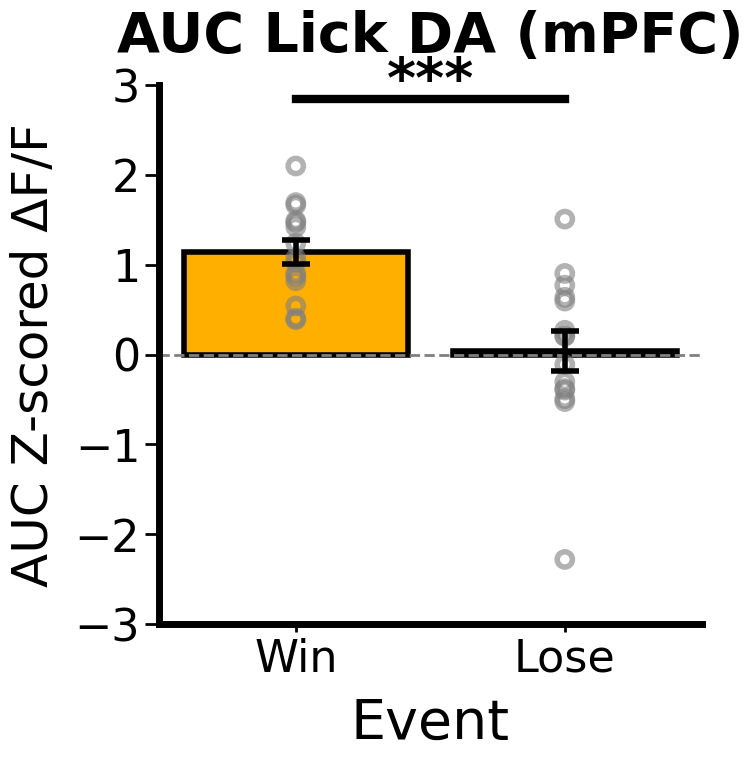

    Tone AUC EI
0     -0.375708
1      0.218515
2     -0.001563
3      2.392522
4      1.964850
5      4.061324
6      2.637756
7      4.306227
8      4.676153
9      4.569442
10     3.730133
    Tone AUC EI
0      1.935625
1     -1.332873
2     -0.025990
3      1.706946
4      0.116297
5      1.115717
6      0.294514
7      1.587460
8      1.300114
9      1.789541
10     3.897271
Index(['Tone AUC EI'], dtype='object')
Processing column: Tone AUC EI
df: 0    -0.375708
1     0.218515
2    -0.001563
3     2.392522
4     1.964850
5     4.061324
6     2.637756
7     4.306227
8     4.676153
9     4.569442
10    3.730133
Name: Tone AUC EI, dtype: float64
df1: 0     1.935625
1    -1.332873
2    -0.025990
3     1.706946
4     0.116297
5     1.115717
6     0.294514
7     1.587460
8     1.300114
9     1.789541
10    3.897271
Name: Tone AUC EI, dtype: float64
T-test for Tone AUC EI and Tone AUC EI: t=2.037, p=5.660e-02


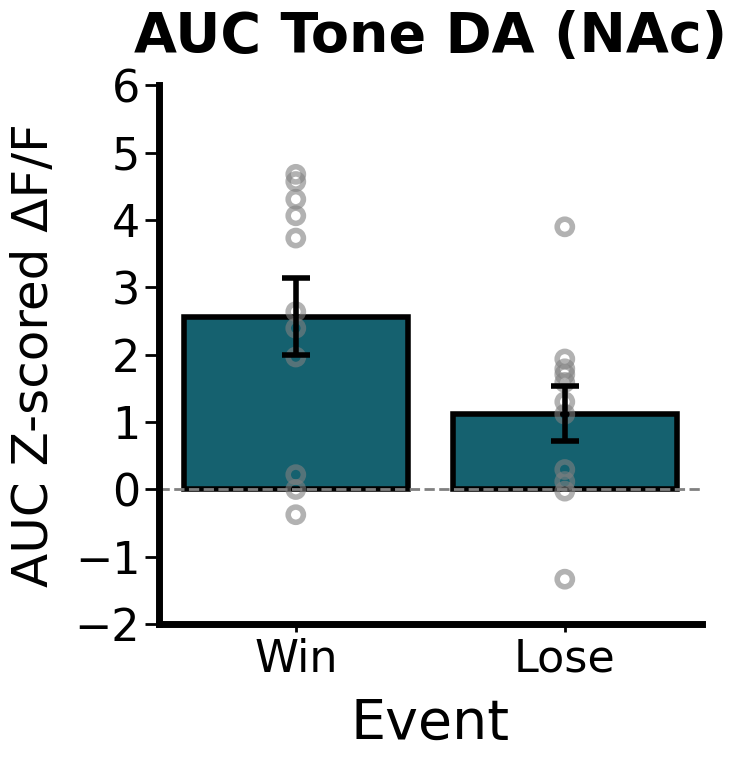

    Tone AUC EI
11     0.298515
12    -0.190139
13     0.114678
14    -0.106836
15     1.827303
16    -0.597828
17    -0.060144
18     0.658947
19     0.966555
20     0.578270
21     0.405884
22     0.206999
23     0.767973
24     0.131182
25     0.607789
    Tone AUC EI
11     0.203915
12    -0.015887
13     0.346235
14     0.353503
15    -0.036443
16    -0.272124
17     0.041183
18    -0.458908
19     0.173190
20    -0.127568
21    -0.812375
22     0.058972
23     0.313842
24     1.055315
25     0.154470
Index(['Tone AUC EI'], dtype='object')
Processing column: Tone AUC EI
df: 11    0.298515
12   -0.190139
13    0.114678
14   -0.106836
15    1.827303
16   -0.597828
17   -0.060144
18    0.658947
19    0.966555
20    0.578270
21    0.405884
22    0.206999
23    0.767973
24    0.131182
25    0.607789
Name: Tone AUC EI, dtype: float64
df1: 11    0.203915
12   -0.015887
13    0.346235
14    0.353503
15   -0.036443
16   -0.272124
17    0.041183
18   -0.458908
19    0.173190
20   -0.127568


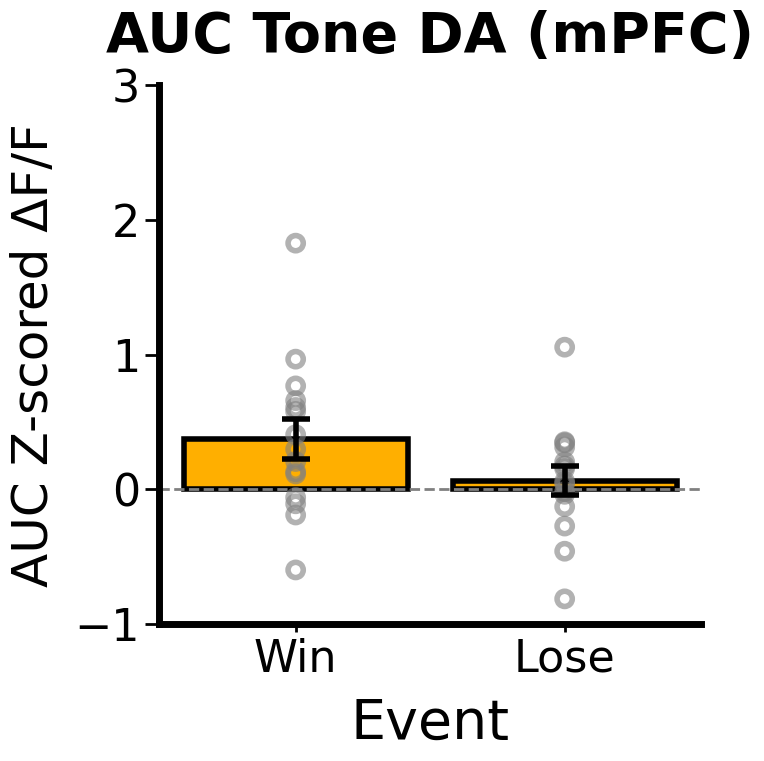

    Lick Max Peak EI
0          -0.252806
1           1.162734
2           1.449057
3           2.515121
4           1.062747
5           0.622156
6           0.904949
7           0.762285
8           2.534987
9           1.828182
10          1.392576
    Lick Max Peak EI
0           0.466940
1           0.602859
2           1.271268
3           1.141050
4           0.792565
5           0.735168
6           1.015220
7           0.892927
8           0.967696
9           0.797479
10          1.199158
Index(['Lick Max Peak EI'], dtype='object')
Processing column: Lick Max Peak EI
df: 0    -0.252806
1     1.162734
2     1.449057
3     2.515121
4     1.062747
5     0.622156
6     0.904949
7     0.762285
8     2.534987
9     1.828182
10    1.392576
Name: Lick Max Peak EI, dtype: float64
df1: 0     0.466940
1     0.602859
2     1.271268
3     1.141050
4     0.792565
5     0.735168
6     1.015220
7     0.892927
8     0.967696
9     0.797479
10    1.199158
Name: Lick Max Peak EI, dtype: float64

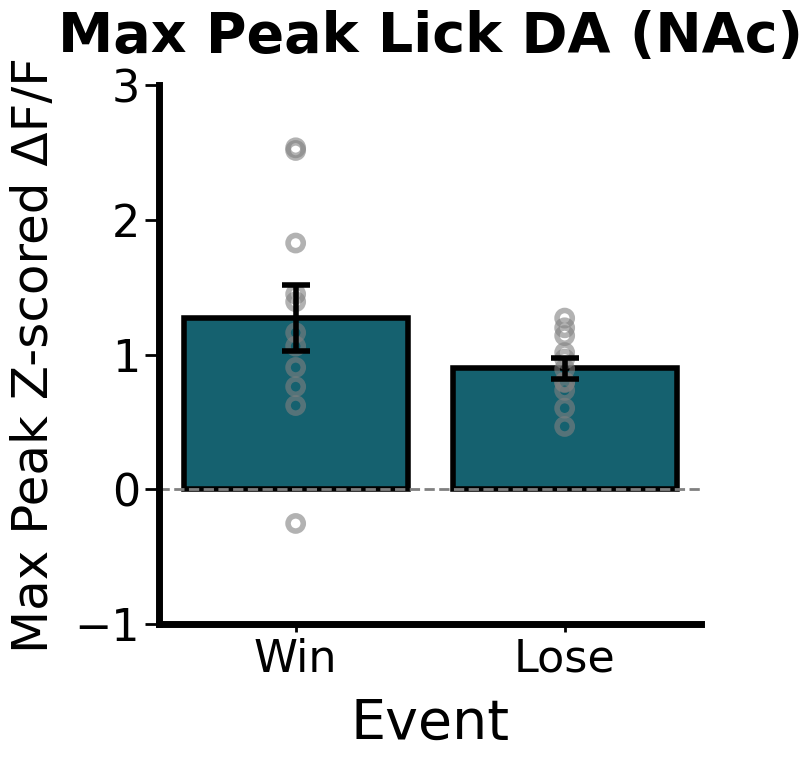

    Lick Max Peak EI
11          0.778746
12          0.922917
13          0.480084
14          0.491702
15          1.244494
16          0.743885
17          0.540929
18          0.878614
19          1.739281
20          0.648524
21          0.709475
22          0.894631
23          1.043064
24          0.863839
25          1.100413
    Lick Max Peak EI
11          0.595436
12          1.002039
13          0.592820
14          0.810428
15          0.270172
16          0.504954
17          0.258109
18          0.350311
19          0.424478
20          0.388020
21          0.695048
22          0.554029
23          0.533691
24          1.473584
25          0.364521
Index(['Lick Max Peak EI'], dtype='object')
Processing column: Lick Max Peak EI
df: 11    0.778746
12    0.922917
13    0.480084
14    0.491702
15    1.244494
16    0.743885
17    0.540929
18    0.878614
19    1.739281
20    0.648524
21    0.709475
22    0.894631
23    1.043064
24    0.863839
25    1.100413
Name: Lick Max Peak

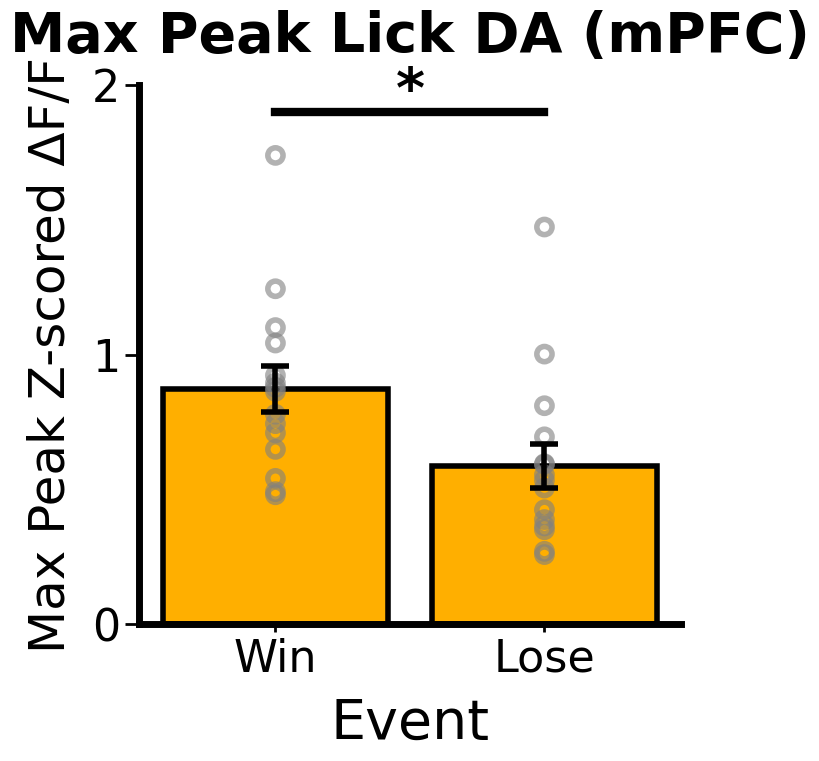

    Tone Max Peak EI
0           1.196984
1           0.574077
2           0.679824
3           1.880586
4           2.816604
5           3.942399
6           2.181421
7           3.886438
8           4.417283
9           4.510064
10          3.163807
    Tone Max Peak EI
0           1.109856
1           0.449906
2           0.472967
3           1.160743
4           1.406033
5           1.574384
6           0.750985
7           1.782979
8           1.508008
9           2.864603
10          2.563139
Index(['Tone Max Peak EI'], dtype='object')
Processing column: Tone Max Peak EI
df: 0     1.196984
1     0.574077
2     0.679824
3     1.880586
4     2.816604
5     3.942399
6     2.181421
7     3.886438
8     4.417283
9     4.510064
10    3.163807
Name: Tone Max Peak EI, dtype: float64
df1: 0     1.109856
1     0.449906
2     0.472967
3     1.160743
4     1.406033
5     1.574384
6     0.750985
7     1.782979
8     1.508008
9     2.864603
10    2.563139
Name: Tone Max Peak EI, dtype: float64

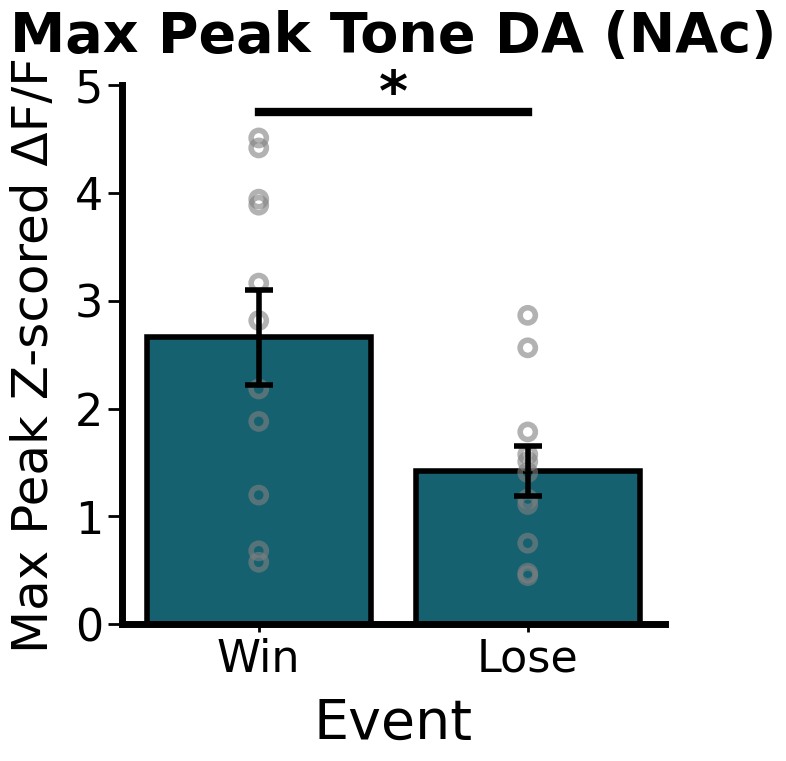

    Tone Max Peak EI
11          0.676231
12          0.497820
13          0.432332
14          0.338296
15          0.983933
16          0.223952
17          0.388548
18          0.733580
19          1.500979
20          0.657064
21          0.712002
22          0.405038
23          0.659351
24          0.534946
25          0.932201
    Tone Max Peak EI
11          0.605397
12          0.575165
13          0.583842
14          0.591285
15          0.279854
16          0.326977
17          0.301790
18          0.477569
19          0.454618
20          0.944596
21          0.476419
22          0.569514
23          0.752410
24          1.223624
25          0.541437
Index(['Tone Max Peak EI'], dtype='object')
Processing column: Tone Max Peak EI
df: 11    0.676231
12    0.497820
13    0.432332
14    0.338296
15    0.983933
16    0.223952
17    0.388548
18    0.733580
19    1.500979
20    0.657064
21    0.712002
22    0.405038
23    0.659351
24    0.534946
25    0.932201
Name: Tone Max Peak

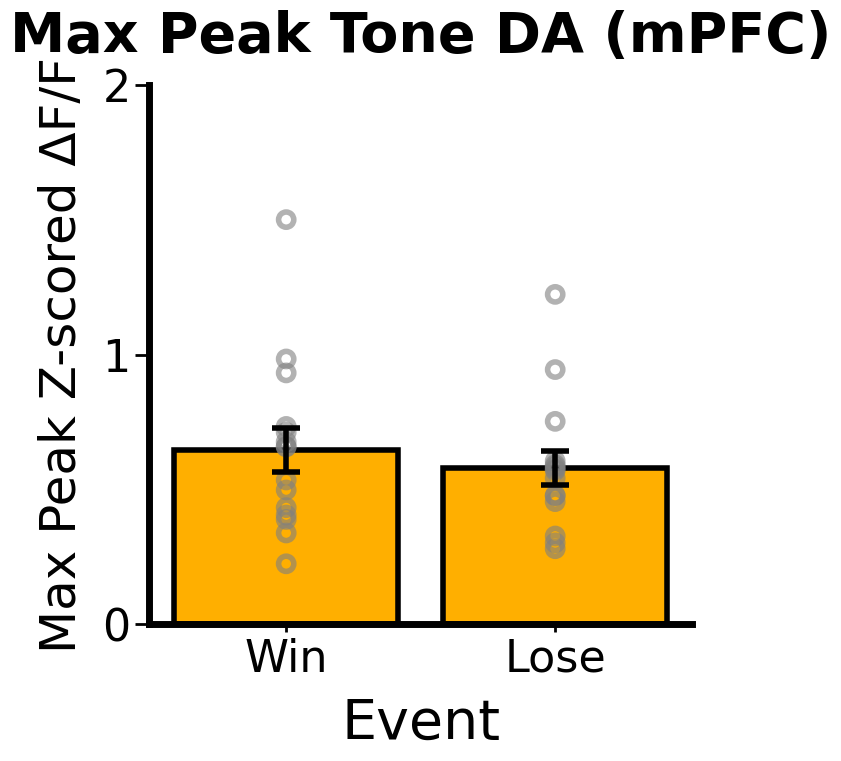

    Lick Mean Z-score EI
0              -0.770631
1               0.568637
2               0.377976
3               1.371270
4               0.422058
5               0.007331
6               0.482648
7               0.211219
8               0.663618
9               0.865385
10              0.757131
    Lick Mean Z-score EI
0               0.077254
1              -0.192470
2               0.341823
3               0.423606
4               0.017682
5               0.010901
6               0.190024
7               0.251908
8               0.504746
9               0.285456
10              0.380434
Index(['Lick Mean Z-score EI'], dtype='object')
Processing column: Lick Mean Z-score EI
df: 0    -0.770631
1     0.568637
2     0.377976
3     1.371270
4     0.422058
5     0.007331
6     0.482648
7     0.211219
8     0.663618
9     0.865385
10    0.757131
Name: Lick Mean Z-score EI, dtype: float64
df1: 0     0.077254
1    -0.192470
2     0.341823
3     0.423606
4     0.017682
5     0.010901
6    

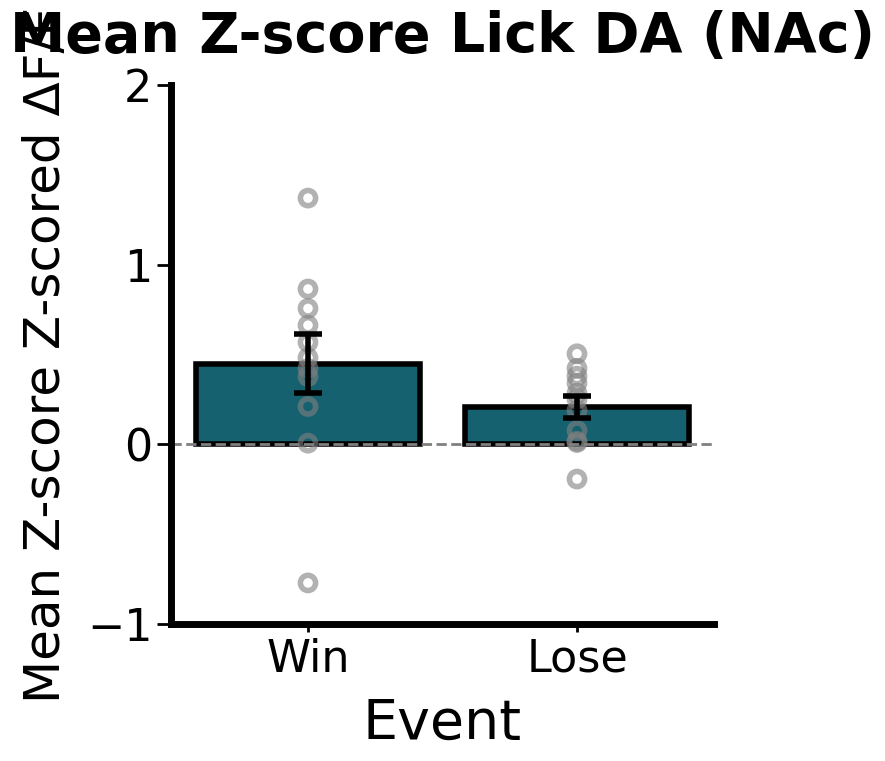

    Lick Mean Z-score EI
11              0.205650
12              0.309669
13              0.135420
14              0.097287
15              0.416430
16              0.368341
17              0.225927
18              0.355405
19              0.524973
20              0.257883
21              0.101289
22              0.423103
23              0.372434
24              0.268343
25              0.218369
    Lick Mean Z-score EI
11              0.193020
12              0.226025
13              0.159515
14              0.149129
15             -0.027550
16              0.050967
17             -0.075745
18             -0.130565
19              0.067776
20             -0.569872
21             -0.098658
22              0.052441
23             -0.094451
24              0.377199
25             -0.122436
Index(['Lick Mean Z-score EI'], dtype='object')
Processing column: Lick Mean Z-score EI
df: 11    0.205650
12    0.309669
13    0.135420
14    0.097287
15    0.416430
16    0.368341
17    0.225927
18 

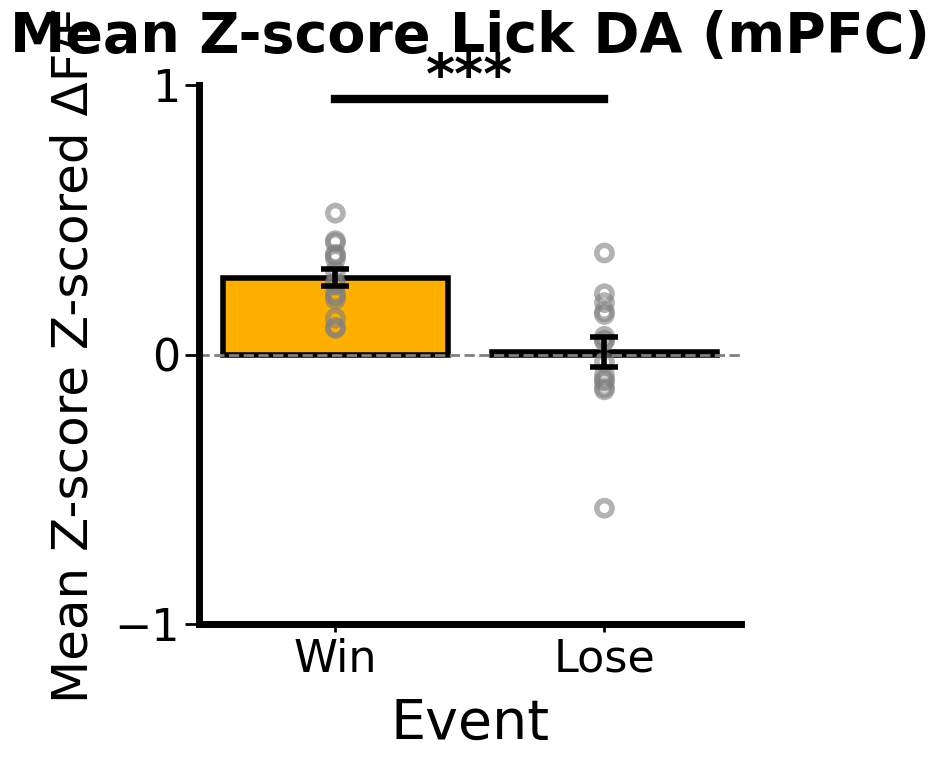

    Tone Mean Z-score EI
0              -0.093973
1               0.054668
2              -0.000364
3               0.598323
4               0.491276
5               1.015409
6               0.659446
7               1.076548
8               1.169130
9               1.142443
10              0.932559
    Tone Mean Z-score EI
0               0.483931
1              -0.333309
2              -0.006499
3               0.426780
4               0.029039
5               0.278931
6               0.073629
7               0.396866
8               0.325039
9               0.447368
10              0.974390
Index(['Tone Mean Z-score EI'], dtype='object')
Processing column: Tone Mean Z-score EI
df: 0    -0.093973
1     0.054668
2    -0.000364
3     0.598323
4     0.491276
5     1.015409
6     0.659446
7     1.076548
8     1.169130
9     1.142443
10    0.932559
Name: Tone Mean Z-score EI, dtype: float64
df1: 0     0.483931
1    -0.333309
2    -0.006499
3     0.426780
4     0.029039
5     0.278931
6    

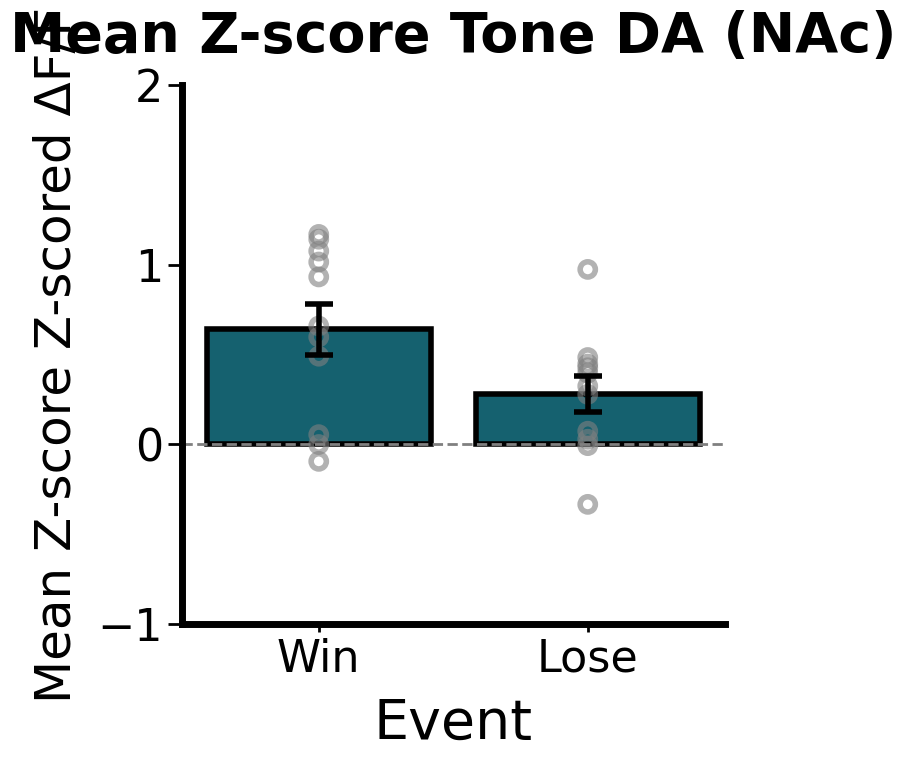

    Tone Mean Z-score EI
11              0.074632
12             -0.047548
13              0.028652
14             -0.026740
15              0.456944
16             -0.149508
17             -0.015038
18              0.164764
19              0.241701
20              0.144563
21              0.101492
22              0.051778
23              0.192029
24              0.032813
25              0.151928
    Tone Mean Z-score EI
11              0.050935
12             -0.003955
13              0.086571
14              0.088395
15             -0.009090
16             -0.068060
17              0.010310
18             -0.114746
19              0.043281
20             -0.031925
21             -0.203115
22              0.014745
23              0.078500
24              0.263947
25              0.038601
Index(['Tone Mean Z-score EI'], dtype='object')
Processing column: Tone Mean Z-score EI
df: 11    0.074632
12   -0.047548
13    0.028652
14   -0.026740
15    0.456944
16   -0.149508
17   -0.015038
18 

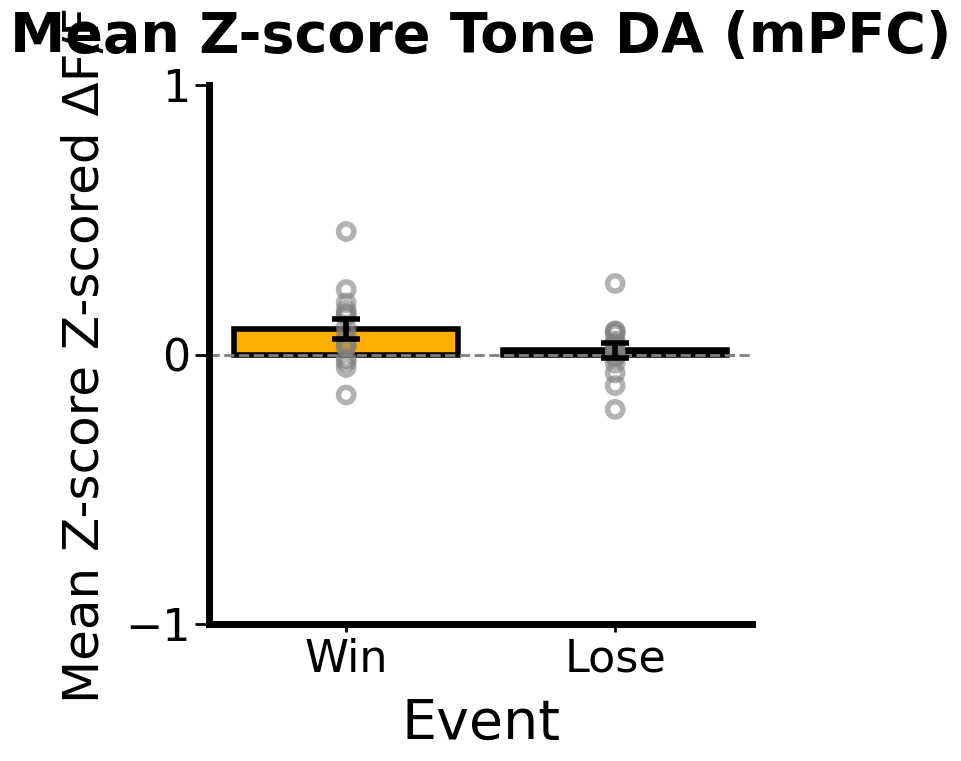

In [ ]:
# Plots win and lose da_metrics in bar plots side by side. Method can be changed for global
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='AUC', directory_path=directory_path2)
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='Max Peak', directory_path=directory_path2)
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='Mean Z-score', directory_path=directory_path2)

## Plots first and last win/lass bouts for Global DA

    Tone AUC First
11        1.092786
12        0.683813
13        1.390407
14       -2.432262
15       -1.261407
16       -4.062865
17        2.785367
18        0.984365
19       -0.344887
20        1.361638
21       -0.841655
22        1.016956
23        0.811898
24       -1.567192
25        0.512226
    Tone AUC Last
11       0.076177
12       2.436269
13      -2.752903
14       2.590221
15      -3.037092
16      -1.823594
17       1.021426
18      -1.199699
19       0.146643
20      -0.518851
21       0.510440
22       0.870756
23       3.056687
24      -1.794395
25       0.982865
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 11    1.092786
12    0.683813
13    1.390407
14   -2.432262
15   -1.261407
16   -4.062865
17    2.785367
18    0.984365
19   -0.344887
20    1.361638
21   -0.841655
22    1.016956
23    0.811898
24   -1.567192
25    0.512226
Name: Tone AUC First, dtype: float64
df1: 11    0.076177
12    2.436269
13   -2.752903
14    2.590221
1

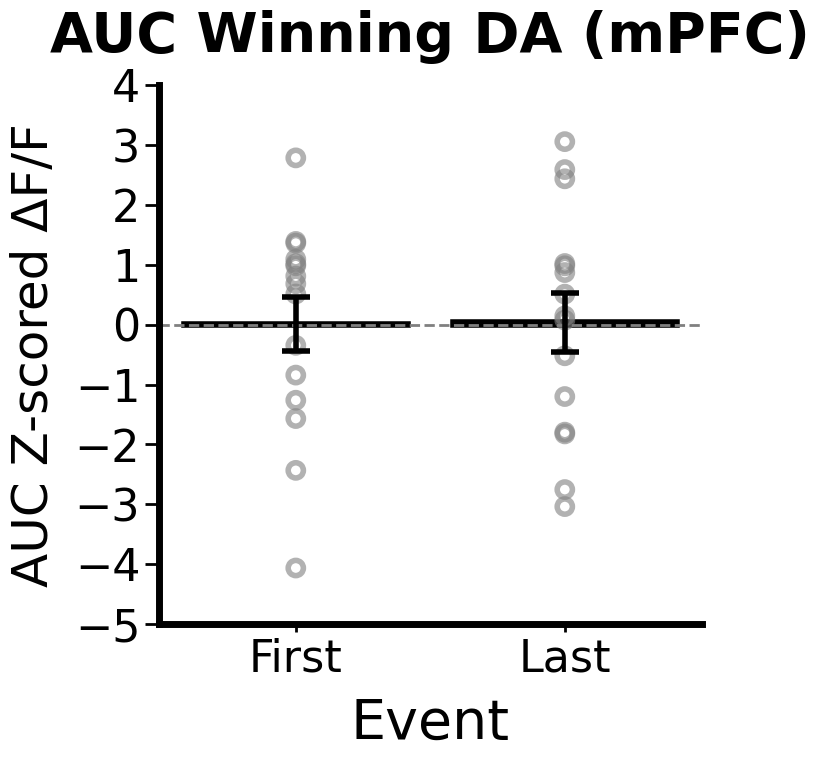

    Tone AUC First
11        2.105667
12        1.992288
13       -2.383187
14        1.898647
15        0.688156
16       -3.107753
17       -3.572182
18       -2.534416
19        0.899148
20       -0.416590
21        1.887549
22        0.044643
23        4.251883
24        1.270017
25        0.558881
    Tone AUC Last
11      -0.015759
12      -0.323638
13       2.114365
14       0.108187
15       0.177095
16       0.075818
17       1.064882
18       0.387070
19      -2.602957
20      -0.048570
21      -0.578052
22       1.437350
23       0.592411
24       1.608331
25       1.178806
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 11    2.105667
12    1.992288
13   -2.383187
14    1.898647
15    0.688156
16   -3.107753
17   -3.572182
18   -2.534416
19    0.899148
20   -0.416590
21    1.887549
22    0.044643
23    4.251883
24    1.270017
25    0.558881
Name: Tone AUC First, dtype: float64
df1: 11   -0.015759
12   -0.323638
13    2.114365
14    0.108187
1

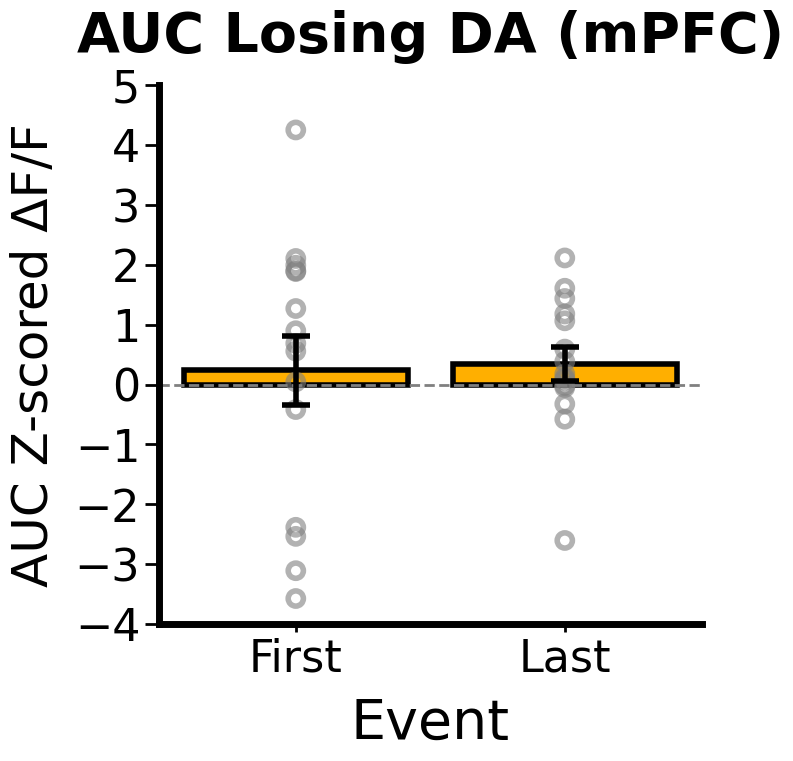

    Tone AUC First
0         1.981747
1        -0.116363
2         1.210131
3         3.287471
4         4.384301
5         5.938531
6         1.376426
7         8.692513
8         6.575658
9         4.572526
10        7.737011
    Tone AUC Last
0        3.876558
1        2.217498
2        0.995702
3        1.316375
4        2.123707
5        4.858727
6        3.296863
7        5.393599
8        3.144169
9        3.822120
10       1.906590
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 0     1.981747
1    -0.116363
2     1.210131
3     3.287471
4     4.384301
5     5.938531
6     1.376426
7     8.692513
8     6.575658
9     4.572526
10    7.737011
Name: Tone AUC First, dtype: float64
df1: 0     3.876558
1     2.217498
2     0.995702
3     1.316375
4     2.123707
5     4.858727
6     3.296863
7     5.393599
8     3.144169
9     3.822120
10    1.906590
Name: Tone AUC Last, dtype: float64
T-test for Tone AUC First and Tone AUC Last: t=1.192, p=2.522e-01


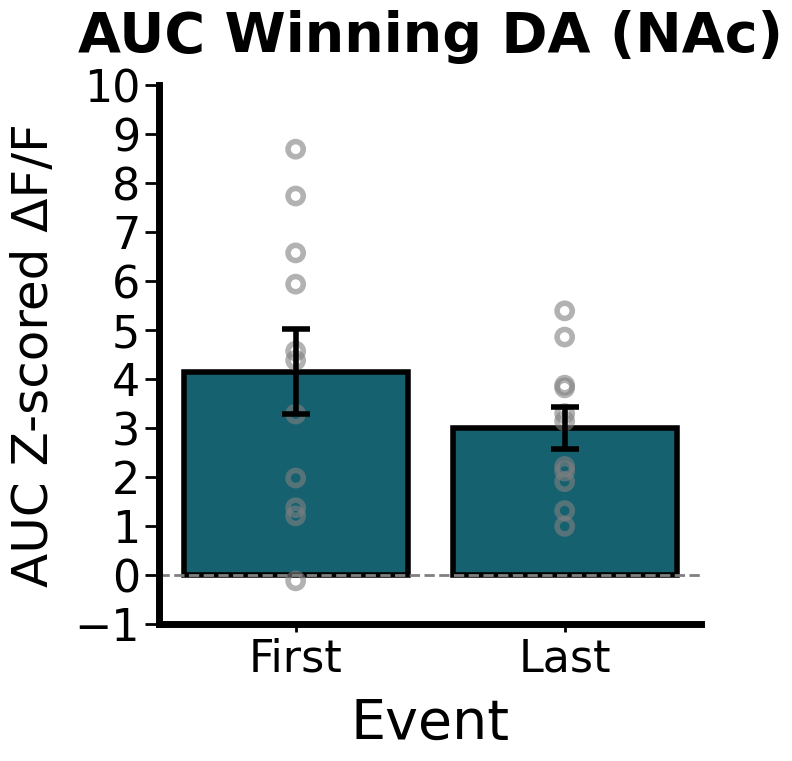

    Tone AUC First
0         1.271436
1         0.781130
2        -0.627179
3        -0.429437
4        -0.746570
5         3.072840
6        -1.166162
7         1.936166
8        -0.402999
9         5.650282
10        1.607133
    Tone AUC Last
0        0.149001
1       -1.817330
2       -0.094105
3        4.071527
4       -2.565025
5       -1.224395
6       -0.469512
7        2.500891
8       -0.373733
9       -1.143996
10       5.394497
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 0     1.271436
1     0.781130
2    -0.627179
3    -0.429437
4    -0.746570
5     3.072840
6    -1.166162
7     1.936166
8    -0.402999
9     5.650282
10    1.607133
Name: Tone AUC First, dtype: float64
df1: 0     0.149001
1    -1.817330
2    -0.094105
3     4.071527
4    -2.565025
5    -1.224395
6    -0.469512
7     2.500891
8    -0.373733
9    -1.143996
10    5.394497
Name: Tone AUC Last, dtype: float64
T-test for Tone AUC First and Tone AUC Last: t=0.607, p=5.511e-01


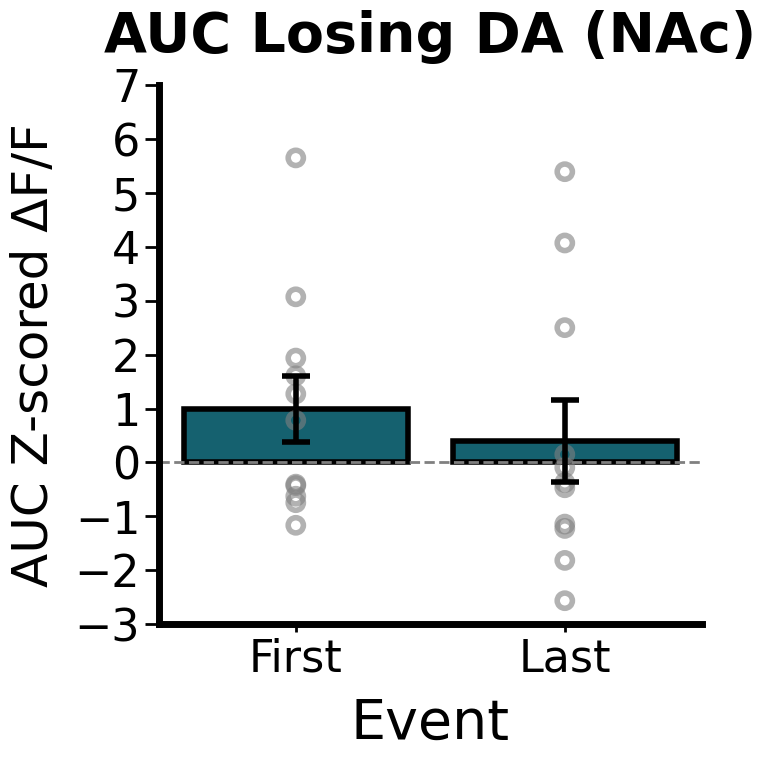

In [ ]:
# Plots bar plots of the first and last wins or loses side by side.
exp.plot_da_first_last(df_win1, metric_name='AUC', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose1, metric_name='AUC', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win1, metric_name='AUC', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose1, metric_name='AUC', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")

In [ ]:
# Same as previous but using Max Peak as metric
"""exp.plot_da_first_last(df_win1, metric_name='Max Peak', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose1, metric_name='Max Peak', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win1, metric_name='Max Peak', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose1, metric_name='Max Peak', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win1, metric_name=\'Max Peak\', method=\'\', directory_path=directory_path, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose1, metric_name=\'Max Peak\', method=\'\', directory_path=directory_path, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win1, metric_name=\'Max Peak\', method=\'\', directory_path=directory_path, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose1, metric_name=\'Max Peak\', method=\'\', directory_path=directory_path, condition="Losing", brain_region="NAc")'

In [ ]:
# Same as previous but using Mean Z-score as metric
"""exp.plot_da_first_last(df_win1, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose1, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win1, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose1, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win1, metric_name=\'Mean Z-score\', method=\'\', directory_path=directory_path, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose1, metric_name=\'Mean Z-score\', method=\'\', directory_path=directory_path, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win1, metric_name=\'Mean Z-score\', method=\'\', directory_path=directory_path, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose1, metric_name=\'Mean Z-score\', method=\'\', directory_path=directory_path, condition="Losing", brain_region="NAc")'

## Plot first and last win/loss bouts for Event Induced DA

In [ ]:
# Same as previous but using EI da metrics.
"""exp.plot_da_first_last(df_win1, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose1, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win1, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose1, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win1, metric_name=\'AUC\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose1, metric_name=\'AUC\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win1, metric_name=\'AUC\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose1, metric_name=\'AUC\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="NAc")'

In [ ]:
"""exp.plot_da_first_last(df_win, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win, metric_name=\'Max Peak\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose, metric_name=\'Max Peak\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win, metric_name=\'Max Peak\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose, metric_name=\'Max Peak\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="NAc")'

In [ ]:
"""exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win, metric_name=\'Mean Z-score\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose, metric_name=\'Mean Z-score\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win, metric_name=\'Mean Z-score\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose, metric_name=\'Mean Z-score\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="NAc")'

## Scatter plots for Event Induced

0
    Rank
0      1
6      1
10     1
4      2
8      2


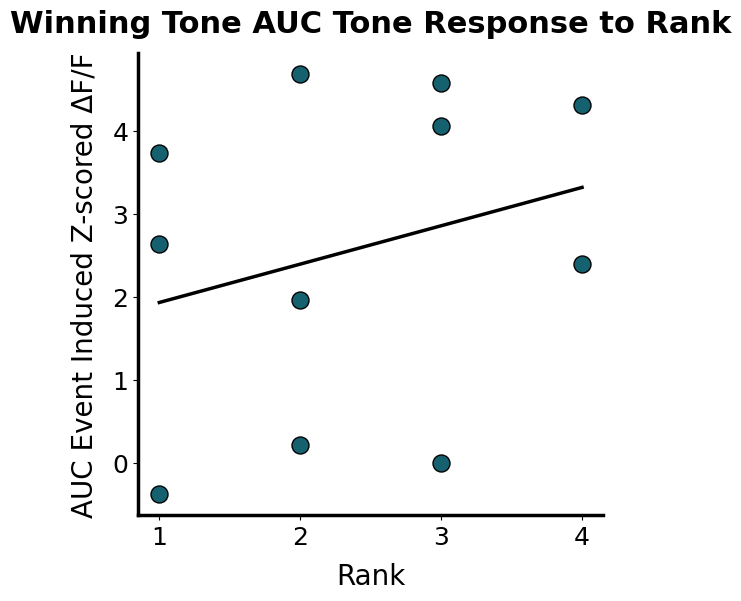

0
    Rank
12     1
16     1
24     1
20     1
21     2


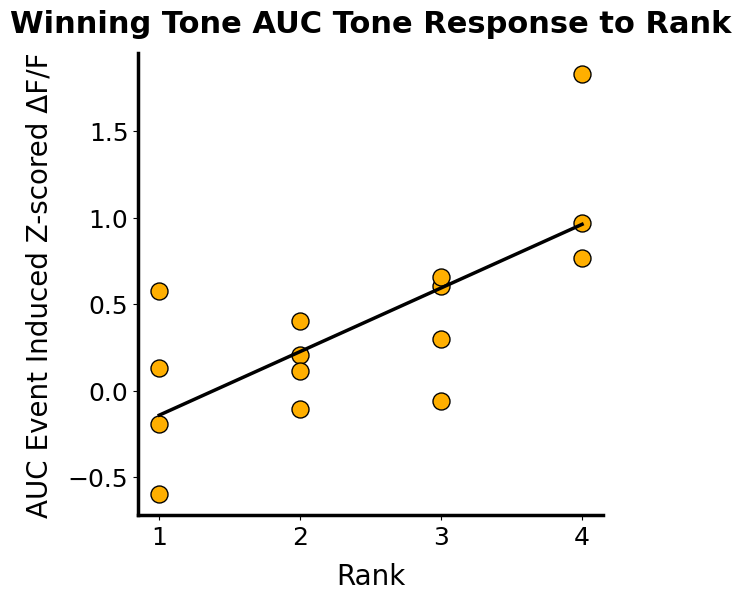

NAc: r=0.271, p=0.419, n=11
mPFC: r=0.715, p=0.003, n=15
0
    Rank
0      1
6      1
10     1
4      2
8      2


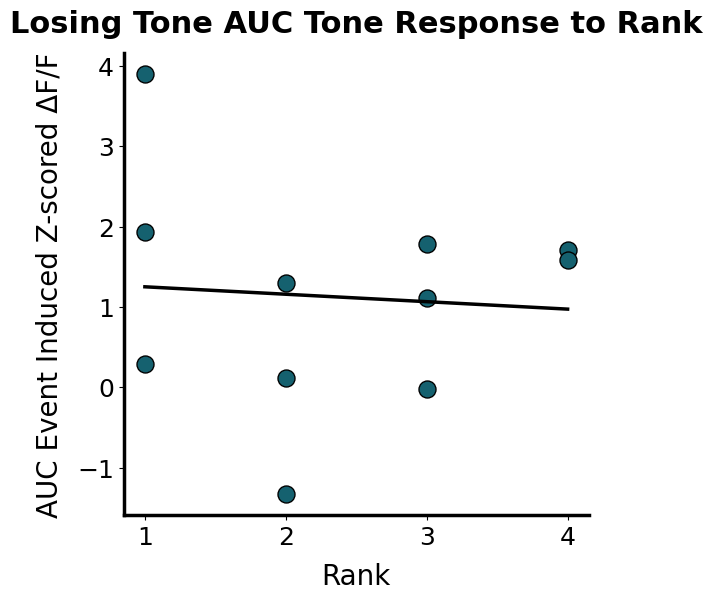

0
    Rank
12     1
16     1
24     1
20     1
21     2


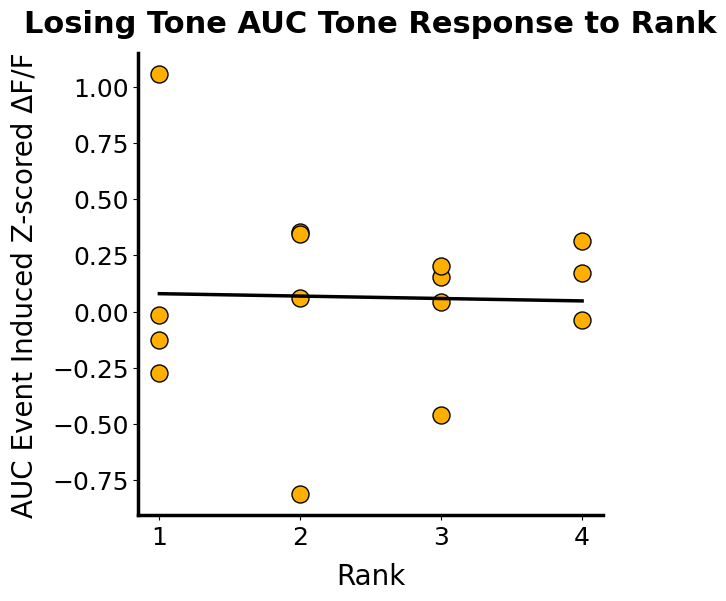

NAc: r=-0.076, p=0.823, n=11
mPFC: r=-0.029, p=0.919, n=15


In [ ]:
# Plots a scatter plot based on DA metric to tone and rank within cage. metric_name can be changed for other metrics
exp.scatter_dominance(directory_path1, df_win1, metric_name='Tone AUC', method='EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_lose1, metric_name='Tone AUC', method='EI', condition="Losing")